In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [4]:
# Chargement du fichier CSV :
file_path = "data.csv"
df = pd.read_csv(file_path)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9564 non-null   int64  
 1   rowid              9564 non-null   int64  
 2   kepid              9564 non-null   int64  
 3   kepoi_name         9564 non-null   object 
 4   kepler_name        2294 non-null   object 
 5   koi_disposition    9564 non-null   object 
 6   koi_pdisposition   9564 non-null   object 
 7   koi_score          8054 non-null   float64
 8   koi_fpflag_nt      9564 non-null   int64  
 9   koi_fpflag_ss      9564 non-null   int64  
 10  koi_fpflag_co      9564 non-null   int64  
 11  koi_fpflag_ec      9564 non-null   int64  
 12  koi_period         9564 non-null   float64
 13  koi_period_err1    9110 non-null   float64
 14  koi_period_err2    9110 non-null   float64
 15  koi_time0bk        9564 non-null   float64
 16  koi_time0bk_err1   9110 

In [6]:
print(df.shape)

(9564, 51)


In [7]:
# Afficher les premières lignes du dataset
display(df.head())

,Unnamed: 0,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [13]:
# Afficher des informations générales sur le dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9564 non-null   int64  
 1   rowid              9564 non-null   int64  
 2   kepid              9564 non-null   int64  
 3   kepoi_name         9564 non-null   object 
 4   kepler_name        2294 non-null   object 
 5   koi_disposition    9564 non-null   object 
 6   koi_pdisposition   9564 non-null   object 
 7   koi_score          8054 non-null   float64
 8   koi_fpflag_nt      9564 non-null   int64  
 9   koi_fpflag_ss      9564 non-null   int64  
 10  koi_fpflag_co      9564 non-null   int64  
 11  koi_fpflag_ec      9564 non-null   int64  
 12  koi_period         9564 non-null   float64
 13  koi_period_err1    9110 non-null   float64
 14  koi_period_err2    9110 non-null   float64
 15  koi_time0bk        9564 non-null   float64
 16  koi_time0bk_err1   9110 

In [15]:
# Statistiques descriptives
display(df.describe())


,Unnamed: 0,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9564.000000,9564.000000,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,4781.500000,4782.500000,7.690628e+06,0.480829,0.188206,0.231598,0.194898,0.120033,75.671358,0.002148,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2761.033321,2761.033321,2.653459e+06,0.476928,0.390897,0.421875,0.396143,0.325018,1334.744046,0.008236,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,0.000000,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,2390.750000,2391.750000,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,4781.500000,4782.500000,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,7172.250000,7173.250000,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,9563.000000,9564.000000,1.293514e+07,1.000000,1.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


In [17]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

Unnamed: 0              0
rowid                   0
kepid                   0
kepoi_name              0
kepler_name          7270
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_deli

La variable cible est 'koi_disposition' pour un modèle catégoriel qui identifie l’existence d’un système solaire qui contient une exoplanète.
Dans la base des données originale la variable catégorielle 'koi_disposition' a trois valeurs :
1.	Confirmed
2.	False positive
3.	Candidate
On va couper la base de données dans deux, une data frame qui continent les données connues avec les valeurs ‘Confirmed’ and ‘False positive’ et une base de données contenant les données qui n’ont été traitées encore, étiquetées ‘Candidate’.



In [20]:
koi_disposition_description = df['koi_disposition'].describe()
print(koi_disposition_description)


count               9564
unique                 3
top       FALSE POSITIVE
freq                5023
Name: koi_disposition, dtype: object


In [22]:
df.duplicated().sum()

0

In [24]:
df_candidate = df[df['koi_disposition'] == 'CANDIDATE']
df_connues = df[df['koi_disposition'] != 'CANDIDATE']

In [26]:
print(df_connues.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7316 entries, 0 to 9563
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7316 non-null   int64  
 1   rowid              7316 non-null   int64  
 2   kepid              7316 non-null   int64  
 3   kepoi_name         7316 non-null   object 
 4   kepler_name        2294 non-null   object 
 5   koi_disposition    7316 non-null   object 
 6   koi_pdisposition   7316 non-null   object 
 7   koi_score          6257 non-null   float64
 8   koi_fpflag_nt      7316 non-null   int64  
 9   koi_fpflag_ss      7316 non-null   int64  
 10  koi_fpflag_co      7316 non-null   int64  
 11  koi_fpflag_ec      7316 non-null   int64  
 12  koi_period         7316 non-null   float64
 13  koi_period_err1    6939 non-null   float64
 14  koi_period_err2    6939 non-null   float64
 15  koi_time0bk        7316 non-null   float64
 16  koi_time0bk_err1   6939 non-n

In [28]:
# Statistiques descriptives
display(df_connues.describe())

,Unnamed: 0,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,7316.000000,7316.000000,7.316000e+03,6257.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,6.939000e+03,...,6904.000000,7016.000000,6919.000000,6919.000000,7016.000000,6919.000000,6919.000000,7316.000000,7316.000000,7315.000000
mean,4728.992482,4729.992482,7.659114e+06,0.360384,0.246036,0.298387,0.254784,0.156916,58.816738,2.123294e-03,...,-164.975956,4.303516,0.122608,-0.142696,1.779288,0.372944,-0.417607,292.143301,43.767705,14.242005
std,2803.978558,2803.978558,2.655142e+06,0.467090,0.430729,0.457582,0.435770,0.363747,121.082398,8.495847e-03,...,75.744604,0.444626,0.134387,0.083503,6.203126,1.014582,2.263816,4.744932,3.599717,1.406877
min,0.000000,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,1.100000e-08,...,-1762.000000,0.047000,0.000000,-1.007000,0.116000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,2287.750000,2288.750000,5.521112e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.237412,3.481000e-06,...,-199.000000,4.206750,0.043000,-0.196000,0.829000,0.128500,-0.258000,288.839360,40.718053,13.407000
50%,4818.500000,4819.500000,7.848890e+06,0.000000,0.000000,0.000000,0.000000,0.000000,8.507657,2.163000e-05,...,-162.000000,4.438000,0.071000,-0.130000,1.000000,0.252000,-0.112000,292.306975,43.596432,14.483000
75%,7190.250000,7191.250000,9.851644e+06,0.996000,0.000000,1.000000,1.000000,0.000000,36.184630,1.758000e-04,...,-117.000000,4.543000,0.152500,-0.089500,1.367000,0.365000,-0.069000,295.931460,46.692538,15.302000
max,9563.000000,9564.000000,1.293514e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1071.232624,1.725000e-01,...,0.000000,5.283000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


In [30]:
# Vérifier les valeurs manquantes
print(df_connues.isnull().sum())
value_counts = df_connues['koi_disposition'].value_counts()

print(value_counts)

Unnamed: 0              0
rowid                   0
kepid                   0
kepoi_name              0
kepler_name          5022
koi_disposition         0
koi_pdisposition        0
koi_score            1059
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       377
koi_period_err2       377
koi_time0bk             0
koi_time0bk_err1      377
koi_time0bk_err2      377
koi_impact            300
koi_impact_err1       377
koi_impact_err2       377
koi_duration            0
koi_duration_err1     377
koi_duration_err2     377
koi_depth             300
koi_depth_err1        377
koi_depth_err2        377
koi_prad              300
koi_prad_err1         300
koi_prad_err2         300
koi_teq               300
koi_teq_err1         7316
koi_teq_err2         7316
koi_insol             259
koi_insol_err1        259
koi_insol_err2        259
koi_model_snr         300
koi_tce_plnt_num      279
koi_tce_deli

In [32]:
# Élimination des lignes contenant des possible bruits
# Les variables qui verifient l'existence des anomalies sont:
#‘koi_fpflag_nt’ , ‘koi_fpflag_ss  ', ‘koi_fpflag_co’ et  koi_fpflag_ec’’.
columns_to_check = ['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_ec', 'koi_fpflag_co']
mask = (df_connues['koi_fpflag_nt'] == 1) | (df_connues['koi_fpflag_ss'] == 1) | (df_connues['koi_fpflag_ec'] == 1) | (df_connues['koi_fpflag_co'] == 1)
df1 = df_connues[~mask]
#df1 = df_connues[mask]
display(df1.describe())

,Unnamed: 0,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,2344.000000,2344.000000,2.344000e+03,2227.000000,2344.0,2344.0,2344.0,2344.0,2344.000000,2.291000e+03,...,2277.000000,2291.000000,2290.000000,2290.000000,2291.000000,2290.000000,2290.000000,2344.000000,2344.000000,2344.000000
mean,2384.735922,2385.735922,8.103187e+06,0.979941,0.0,0.0,0.0,0.0,29.065960,3.577769e-04,...,-125.632850,4.409818,0.090056,-0.110185,1.075679,0.186163,-0.155909,290.977341,44.375782,14.330301
std,1774.389070,1774.389070,2.606727e+06,0.075087,0.0,0.0,0.0,0.0,55.370742,2.208787e-03,...,52.472635,0.239110,0.079707,0.069954,0.743704,0.193696,0.320495,4.732998,3.590741,1.244915
min,0.000000,1.000000,7.574500e+05,0.001000,0.0,0.0,0.0,0.0,0.241843,2.700000e-08,...,-712.000000,2.410000,0.000000,-0.748000,0.118000,0.000000,-9.038000,280.249450,36.577381,8.224000
25%,1067.500000,1068.500000,6.152974e+06,0.994000,0.0,0.0,0.0,0.0,5.169728,1.163000e-05,...,-155.000000,4.290000,0.036000,-0.128000,0.808000,0.068000,-0.164000,287.343253,41.469850,13.651000
50%,2048.500000,2049.500000,8.380956e+06,1.000000,0.0,0.0,0.0,0.0,11.496012,3.932000e-05,...,-113.000000,4.456000,0.065000,-0.105000,0.968000,0.162000,-0.090000,291.158780,44.376525,14.599000
75%,3263.250000,3264.250000,1.021397e+07,1.000000,0.0,0.0,0.0,0.0,26.799819,1.302500e-04,...,-84.000000,4.556500,0.130000,-0.054000,1.199500,0.246750,-0.056000,294.779932,47.258768,15.258250
max,9540.000000,9541.000000,1.283487e+07,1.000000,0.0,0.0,0.0,0.0,704.962626,5.099000e-02,...,0.000000,5.274000,0.765000,0.000000,19.530000,4.422000,0.000000,301.720760,52.198090,17.475000


In [34]:
value_counts = df1['koi_disposition'].value_counts()

print(value_counts)

koi_disposition
CONFIRMED         2239
FALSE POSITIVE     105
Name: count, dtype: int64


Enlever les colonnes `kepler_name`, `koi_teq_err1` et `koi_teq_err2`parce que le nombre des valeurs manquantes est majoritaire.

On va enlever aussi les colonnes reliées au temps de lènregistrement des données`koi_time0bk`  `koi_time0bk_err1` et `koi_time0bk_err2`.
On va aussi éliminer les variables de type objet indiquant different nommes:'koi_pdisposition', 'kepoi_name', 'kepler_name', 'koi_tce_delivname'. Nous n'avons pas besoin des variables représentant les nombre d'identification: `kepoi_name` et `kepid` qui sont de type numérique.
Les variables qui verifient l'existence des anomalies. ‘koi_fpflag_nt’ , ‘koi_fpflag_ss  ', ‘koi_fpflag_co’ et  koi_fpflag_ec’’ ont maintenant la valeur 0, alors on va les eliminer aussi.

In [37]:


columns_to_drop = ['Unnamed: 0', 'kepler_name', 'koi_teq_err1', 'koi_teq_err2','rowid' ,'kepid','koi_time0bk', 'koi_time0bk_err1','koi_time0bk_err2', 'koi_pdisposition', 'kepoi_name', 'kepler_name', 'koi_tce_delivname','koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_ec', 'koi_fpflag_co']



df3 = df1.drop(columns=columns_to_drop)
print(df3.isnull().sum())
df3.info()


koi_disposition        0
koi_score            117
koi_period             0
koi_period_err1       53
koi_period_err2       53
koi_impact            53
koi_impact_err1       53
koi_impact_err2       53
koi_duration           0
koi_duration_err1     53
koi_duration_err2     53
koi_depth             53
koi_depth_err1        53
koi_depth_err2        53
koi_prad              53
koi_prad_err1         53
koi_prad_err2         53
koi_teq               53
koi_insol             53
koi_insol_err1        53
koi_insol_err2        53
koi_model_snr         53
koi_tce_plnt_num     105
koi_steff             53
koi_steff_err1        54
koi_steff_err2        67
koi_slogg             53
koi_slogg_err1        54
koi_slogg_err2        54
koi_srad              53
koi_srad_err1         54
koi_srad_err2         54
ra                     0
dec                    0
koi_kepmag             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 2344 entries, 0 to 9540
Data columns (total 35 columns):
 #   Colum

Parce-que la base des données n’est pas balancée, on doit remplacer toutes les valeurs manquantes même si le pourcentage des valeurs manquantes est moins de 5% pour toutes les variables.
On peut voir que pour toutes les variables on peut utiliser le mode comme méthode de remplacement des valeurs nulles.

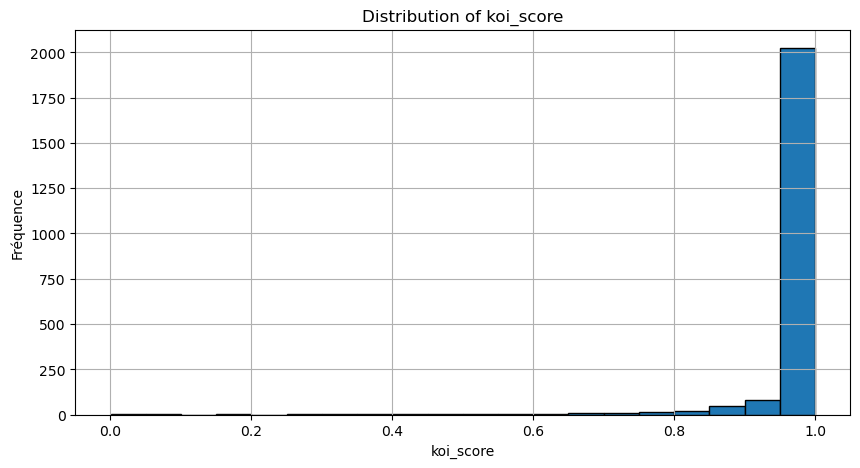

In [40]:
# Histogramme pour koi_score
plt.figure(figsize=(10,5))
plt.hist(df3['koi_score'], bins=20, edgecolor ='k')
plt.title('Distribution of koi_score')
plt.xlabel('koi_score')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

In [42]:
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2344 entries, 0 to 9540
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    2344 non-null   object 
 1   koi_score          2227 non-null   float64
 2   koi_period         2344 non-null   float64
 3   koi_period_err1    2291 non-null   float64
 4   koi_period_err2    2291 non-null   float64
 5   koi_impact         2291 non-null   float64
 6   koi_impact_err1    2291 non-null   float64
 7   koi_impact_err2    2291 non-null   float64
 8   koi_duration       2344 non-null   float64
 9   koi_duration_err1  2291 non-null   float64
 10  koi_duration_err2  2291 non-null   float64
 11  koi_depth          2291 non-null   float64
 12  koi_depth_err1     2291 non-null   float64
 13  koi_depth_err2     2291 non-null   float64
 14  koi_prad           2291 non-null   float64
 15  koi_prad_err1      2291 non-null   float64
 16  koi_prad_err2      2291 non-n

In [44]:
# Imputation par le mode pour toutes les valeurs manquantes
imputer_mode = SimpleImputer(strategy='most_frequent')
df3.loc[:, 'koi_score'] = imputer_mode.fit_transform(df3[['koi_score']])[:,0]
df3.loc[:, 'koi_period_err1'] = imputer_mode.fit_transform(df3[['koi_period_err1']])[:,0]
df3.loc[:, 'koi_period_err2'] = imputer_mode.fit_transform(df3[['koi_period_err2']])[:,0]
df3.loc[:, 'koi_impact'] = imputer_mode.fit_transform(df3[['koi_impact']])[:,0]
df3.loc[:, 'koi_impact_err1'] = imputer_mode.fit_transform(df3[['koi_impact_err1']])[:,0]
df3.loc[:, 'koi_impact_err2'] = imputer_mode.fit_transform(df3[['koi_impact_err2']])[:,0]
df3.loc[:, 'koi_duration_err1'] = imputer_mode.fit_transform(df3[['koi_duration_err1']])[:,0]
df3.loc[:, 'koi_duration_err2'] = imputer_mode.fit_transform(df3[['koi_duration_err2']])[:,0]
df3.loc[:, 'koi_depth'] = imputer_mode.fit_transform(df3[['koi_depth']])[:,0]
df3.loc[:, 'koi_depth_err1'] = imputer_mode.fit_transform(df3[['koi_depth_err1']])[:,0]
df3.loc[:, 'koi_depth_err2'] = imputer_mode.fit_transform(df3[['koi_depth_err2']])[:,0]
df3.loc[:, 'koi_prad'] = imputer_mode.fit_transform(df3[['koi_prad']])[:,0]
df3.loc[:, 'koi_prad_err1'] = imputer_mode.fit_transform(df3[['koi_prad_err1']])[:,0]
df3.loc[:, 'koi_prad_err2'] = imputer_mode.fit_transform(df3[['koi_prad_err2']])[:,0]
df3.loc[:, 'koi_teq'] = imputer_mode.fit_transform(df3[['koi_teq']])[:,0]
df3.loc[:, 'koi_insol'] = imputer_mode.fit_transform(df3[['koi_insol']])[:,0]
df3.loc[:, 'koi_insol_err1'] = imputer_mode.fit_transform(df3[['koi_insol_err1']])[:,0]
df3.loc[:, 'koi_insol_err2'] = imputer_mode.fit_transform(df3[['koi_insol_err2']])[:,0]
df3.loc[:, 'koi_model_snr'] = imputer_mode.fit_transform(df3[['koi_model_snr']])[:,0]
df3.loc[:, 'koi_slogg'] = imputer_mode.fit_transform(df3[['koi_slogg']])[:,0]
df3.loc[:, 'koi_slogg_err1'] = imputer_mode.fit_transform(df3[['koi_slogg_err1']])[:,0]
df3.loc[:, 'koi_slogg_err2'] = imputer_mode.fit_transform(df3[['koi_slogg_err2']])[:,0]
df3.loc[:, 'koi_steff'] = imputer_mode.fit_transform(df3[['koi_steff']])[:,0]
df3.loc[:, 'koi_steff_err1'] = imputer_mode.fit_transform(df3[['koi_steff_err1']])[:,0]
df3.loc[:, 'koi_steff_err2'] = imputer_mode.fit_transform(df3[['koi_steff_err2']])[:,0]
df3.loc[:, 'koi_srad'] = imputer_mode.fit_transform(df3[['koi_srad']])[:,0]
df3.loc[:, 'koi_srad_err1'] = imputer_mode.fit_transform(df3[['koi_srad_err1']])[:,0]
df3.loc[:, 'koi_srad_err2'] = imputer_mode.fit_transform(df3[['koi_srad_err2']])[:,0]
df3.loc[:, 'koi_tce_plnt_num'] = imputer_mode.fit_transform(df3[['koi_tce_plnt_num']])[:,0]



'''columns_to_convert = [col for col in df3.columns if col != '  koi_disposition']

numerical_df = pd.DataFrame()

# Convert the selected columns to numeric, coercing errors to NaN
for col in columns_to_convert:
    numerical_df[col] = pd.to_numeric(df3[col], errors='coerce')

# If you want to include the excluded column in the final DataFrame as is
numerical_df['your_excluded_column'] = df3['koi_disposition']

# Display the information of the new DataFrame
print(numerical_df.info())

# Display the first few rows of the new DataFrame
#print(numerical_df.head())
print(numerical_df.info())'''

print(df3.info())
print(df3.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 2344 entries, 0 to 9540
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    2344 non-null   object 
 1   koi_score          2344 non-null   float64
 2   koi_period         2344 non-null   float64
 3   koi_period_err1    2344 non-null   float64
 4   koi_period_err2    2344 non-null   float64
 5   koi_impact         2344 non-null   float64
 6   koi_impact_err1    2344 non-null   float64
 7   koi_impact_err2    2344 non-null   float64
 8   koi_duration       2344 non-null   float64
 9   koi_duration_err1  2344 non-null   float64
 10  koi_duration_err2  2344 non-null   float64
 11  koi_depth          2344 non-null   float64
 12  koi_depth_err1     2344 non-null   float64
 13  koi_depth_err2     2344 non-null   float64
 14  koi_prad           2344 non-null   float64
 15  koi_prad_err1      2344 non-null   float64
 16  koi_prad_err2      2344 non-n

In [46]:
value_counts = df3['koi_disposition'].value_counts()

print(value_counts)

koi_disposition
CONFIRMED         2239
FALSE POSITIVE     105
Name: count, dtype: int64


In [48]:
display(df3.head(10))
display(df3.describe())

,koi_disposition,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,1.000,9.488036,2.775000e-05,-2.775000e-05,0.146,0.318,-0.146,2.95750,0.08190,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0.969,54.418383,2.479000e-04,-2.479000e-04,0.586,0.059,-0.443,4.50700,0.11600,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
4,CONFIRMED,1.000,2.525592,3.761000e-06,-3.761000e-06,0.701,0.235,-0.478,1.65450,0.04200,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,CONFIRMED,1.000,11.094321,2.036000e-05,-2.036000e-05,0.538,0.030,-0.428,4.59450,0.06100,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,CONFIRMED,1.000,4.134435,1.046000e-05,-1.046000e-05,0.762,0.139,-0.532,3.14020,0.06730,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
7,CONFIRMED,0.992,2.566589,1.781000e-05,-1.781000e-05,0.755,0.212,-0.523,2.42900,0.16500,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
9,CONFIRMED,1.000,16.068647,1.088000e-05,-1.088000e-05,0.052,0.262,-0.052,3.53470,0.02410,...,-83.0,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841
10,CONFIRMED,0.811,2.470613,2.700000e-08,-2.700000e-08,0.818,0.001,-0.001,1.74319,0.00107,...,-78.0,4.457,0.024,-0.024,0.964,0.038,-0.038,286.80847,49.316399,11.338
12,CONFIRMED,0.998,3.522498,1.980000e-07,-1.980000e-07,0.631,0.007,-0.007,3.19843,0.00653,...,-137.0,4.169,0.055,-0.045,1.451,0.110,-0.110,281.28812,42.451080,13.563
13,CONFIRMED,1.000,3.709214,6.536000e-06,-6.536000e-06,0.051,0.395,-0.051,2.63020,0.04270,...,-117.0,4.407,0.085,-0.114,1.022,0.143,-0.107,295.64871,48.495560,12.772


,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,2344.000000,2344.000000,2.344000e+03,2.344000e+03,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,...,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000
mean,0.980942,29.065960,3.499172e-04,-3.578114e-04,0.461023,0.292086,-0.317639,4.427131,0.140709,-0.140709,...,-124.299915,4.412716,0.089179,-0.110227,1.067659,0.182566,-0.153008,290.977341,44.375782,14.330301
std,0.073318,55.370742,2.184274e-03,2.183662e-03,2.055534,2.538633,0.694158,3.222901,0.250688,0.250688,...,52.297706,0.237158,0.078990,0.069144,0.737134,0.192880,0.317343,4.732998,3.590741,1.244915
min,0.001000,0.241843,2.700000e-08,-5.099000e-02,0.000000,0.000000,-31.260000,0.427900,0.000730,-5.900000,...,-712.000000,2.410000,0.000000,-0.748000,0.118000,0.000000,-9.038000,280.249450,36.577381,8.224000
25%,0.995000,5.169728,1.066500e-05,-1.434000e-04,0.067750,0.042000,-0.508250,2.523525,0.053075,-0.155250,...,-153.000000,4.300750,0.037000,-0.128000,0.798000,0.063000,-0.160000,287.343253,41.469850,13.651000
50%,1.000000,11.496012,3.610500e-05,-4.093000e-05,0.376000,0.180000,-0.300000,3.605950,0.092050,-0.092050,...,-111.000000,4.460000,0.063000,-0.108000,0.959500,0.160000,-0.088000,291.158780,44.376525,14.599000
75%,1.000000,26.799819,1.272250e-04,-1.201750e-05,0.742000,0.352000,-0.054000,5.403475,0.155250,-0.053075,...,-83.000000,4.554000,0.126000,-0.055000,1.193250,0.245000,-0.054000,294.779932,47.258768,15.258250
max,1.000000,704.962626,5.099000e-02,-2.700000e-08,98.602100,73.170000,0.000000,54.520000,5.900000,-0.000730,...,0.000000,5.274000,0.765000,0.000000,19.530000,4.422000,0.000000,301.720760,52.198090,17.475000


In [50]:
# Verification des valeurs negatives
'''numeric_df = df3.select_dtypes(include=[np.number])
negative_locations = []
for col in numeric_df.columns:
    negative_mask = numeric_df[col] < 0
    if negative_mask.any():
        negative_indices = numeric_df.index[negative_mask].tolist()
        for row_index in negative_indices:
            negative_locations.append({'row': row_index, 'column': col, 'value': numeric_df.loc[row_index, col]})

if negative_locations:
    print("Negative values found at the following locations:")
    for location in negative_locations:
        print(f"  Row: {location['row']}, Column: '{location['column']}', Value: {location['value']}")
else:
    print("No negative values found in the dataset.")'''

'numeric_df = df3.select_dtypes(include=[np.number])\nnegative_locations = []\nfor col in numeric_df.columns:\n    negative_mask = numeric_df[col] < 0\n    if negative_mask.any():\n        negative_indices = numeric_df.index[negative_mask].tolist()\n        for row_index in negative_indices:\n            negative_locations.append({\'row\': row_index, \'column\': col, \'value\': numeric_df.loc[row_index, col]})\n\nif negative_locations:\n    print("Negative values found at the following locations:")\n    for location in negative_locations:\n        print(f"  Row: {location[\'row\']}, Column: \'{location[\'column\']}\', Value: {location[\'value\']}")\nelse:\n    print("No negative values found in the dataset.")'

In [55]:
#display(numeric_df)

In [58]:
# Vérification des valeurs  outliers
#Selectioner uniquement les collones numeriques
numeric_df = df3.select_dtypes(include=[np.number])

# Calcul de Q1, Q3 et IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
k=1.5


# Identification et comptage des bornes inférieure et supérieure pour les outliers
lower_bound = Q1 - k * IQR
upper_bound = Q3 + k * IQR

# Initialiser un dictionaire pour stocker le nombre des outliers par colonne
outlier_counts = {}

# Identification et comptage des outliers par colonne
for column in numeric_df.columns:
    lower_outliners_count = numeric_df[numeric_df[column] < lower_bound[column]][column].count()
    upper_outliners_count = numeric_df[numeric_df[column] > upper_bound[column]][column].count()
    outlier_counts[column] = lower_outliners_count + upper_outliners_count

# Affichage du nombre de valeurs aberrantes par colonne
for column, count in outlier_counts.items():
    print(f"Nombre des outliers dans la colonne '{column}': {count}")

Nombre des outliers dans la colonne 'koi_score': 419
Nombre des outliers dans la colonne 'koi_period': 266
Nombre des outliers dans la colonne 'koi_period_err1': 312
Nombre des outliers dans la colonne 'koi_period_err2': 333
Nombre des outliers dans la colonne 'koi_impact': 1
Nombre des outliers dans la colonne 'koi_impact_err1': 7
Nombre des outliers dans la colonne 'koi_impact_err2': 3
Nombre des outliers dans la colonne 'koi_duration': 122
Nombre des outliers dans la colonne 'koi_duration_err1': 152
Nombre des outliers dans la colonne 'koi_duration_err2': 152
Nombre des outliers dans la colonne 'koi_depth': 207
Nombre des outliers dans la colonne 'koi_depth_err1': 137
Nombre des outliers dans la colonne 'koi_depth_err2': 137
Nombre des outliers dans la colonne 'koi_prad': 192
Nombre des outliers dans la colonne 'koi_prad_err1': 162
Nombre des outliers dans la colonne 'koi_prad_err2': 215
Nombre des outliers dans la colonne 'koi_teq': 71
Nombre des outliers dans la colonne 'koi_insol

In [60]:
for column in numeric_df.columns:

    # Calcul de Q1, Q3 et IQR
    Q1 = df3[column] .quantile(0.25)
    Q3 = df3[column] .quantile(0.75)
    IQR = Q3 - Q1
    k = 1.5

    # Identification et comptage des bornes inférieure et supérieure pour les valeurs aberantes
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR


    df3.loc[df3[column] < lower_bound, column] = lower_bound

    # remplacement des valeurs aberantes supérieures au seuil supérieur

    df3.loc[df3[column] > upper_bound, column] = upper_bound



In [62]:
# Vérification des valeurs  outliers
#Selectioner uniquement les collones numeriques
numeric_df = df3.select_dtypes(include=[np.number])

# Calcul de Q1, Q3 et IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
k = 1.5
# Identification et comptage des bornes inférieure et supérieure pour les outliers
lower_bound = Q1 - k * IQR
upper_bound = Q3 + k * IQR

# Initialiser un dictionaire pour stocker le nombre des outliers par colonne
outlier_counts = {}

# Identification et comptage des outliers par colonne
for column in numeric_df.columns:
    lower_outliners_count = numeric_df[numeric_df[column] < lower_bound[column]][column].count()
    upper_outliners_count = numeric_df[numeric_df[column] > upper_bound[column]][column].count()
    outlier_counts[column] = lower_outliners_count + upper_outliners_count

# Affichage du nombre de valeurs aberrantes par colonne
for column, count in outlier_counts.items():
    print(f"Nombre des outliers dans la colonne '{column}': {count}")

Nombre des outliers dans la colonne 'koi_score': 0
Nombre des outliers dans la colonne 'koi_period': 0
Nombre des outliers dans la colonne 'koi_period_err1': 0
Nombre des outliers dans la colonne 'koi_period_err2': 0
Nombre des outliers dans la colonne 'koi_impact': 0
Nombre des outliers dans la colonne 'koi_impact_err1': 0
Nombre des outliers dans la colonne 'koi_impact_err2': 0
Nombre des outliers dans la colonne 'koi_duration': 0
Nombre des outliers dans la colonne 'koi_duration_err1': 0
Nombre des outliers dans la colonne 'koi_duration_err2': 0
Nombre des outliers dans la colonne 'koi_depth': 0
Nombre des outliers dans la colonne 'koi_depth_err1': 0
Nombre des outliers dans la colonne 'koi_depth_err2': 0
Nombre des outliers dans la colonne 'koi_prad': 0
Nombre des outliers dans la colonne 'koi_prad_err1': 0
Nombre des outliers dans la colonne 'koi_prad_err2': 0
Nombre des outliers dans la colonne 'koi_teq': 0
Nombre des outliers dans la colonne 'koi_insol': 0
Nombre des outliers da

In [64]:
value_counts = df3['koi_disposition'].value_counts()

print(value_counts)

koi_disposition
CONFIRMED         2239
FALSE POSITIVE     105
Name: count, dtype: int64


In [66]:
display(df3.head(10))
display(df3.describe())

,koi_disposition,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,1.0000,9.488036,2.775000e-05,-2.775000e-05,0.146,0.318,-0.146,2.95750,0.08190,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0.9875,54.418383,2.479000e-04,-2.479000e-04,0.586,0.059,-0.443,4.50700,0.11600,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
4,CONFIRMED,1.0000,2.525592,3.761000e-06,-3.761000e-06,0.701,0.235,-0.478,1.65450,0.04200,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,CONFIRMED,1.0000,11.094321,2.036000e-05,-2.036000e-05,0.538,0.030,-0.428,4.59450,0.06100,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,CONFIRMED,1.0000,4.134435,1.046000e-05,-1.046000e-05,0.762,0.139,-0.532,3.14020,0.06730,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
7,CONFIRMED,0.9920,2.566589,1.781000e-05,-1.781000e-05,0.755,0.212,-0.523,2.42900,0.16500,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
9,CONFIRMED,1.0000,16.068647,1.088000e-05,-1.088000e-05,0.052,0.262,-0.052,3.53470,0.02410,...,-83.0,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841
10,CONFIRMED,0.9875,2.470613,2.700000e-08,-2.700000e-08,0.818,0.001,-0.001,1.74319,0.00107,...,-78.0,4.457,0.024,-0.024,0.964,0.038,-0.038,286.80847,49.316399,11.338
12,CONFIRMED,0.9980,3.522498,1.980000e-07,-1.980000e-07,0.631,0.007,-0.007,3.19843,0.00653,...,-137.0,4.169,0.055,-0.045,1.451,0.110,-0.110,281.28812,42.451080,13.563
13,CONFIRMED,1.0000,3.709214,6.536000e-06,-6.536000e-06,0.051,0.395,-0.051,2.63020,0.04270,...,-117.0,4.407,0.085,-0.114,1.022,0.143,-0.107,295.64871,48.495560,12.772


,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,2344.000000,2344.000000,2.344000e+03,2.344000e+03,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,...,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000
mean,0.996799,19.277650,8.704076e-05,-9.934834e-05,0.419705,0.199137,-0.301838,4.217072,0.114214,-0.114214,...,-123.459898,4.420590,0.085424,-0.107661,1.013784,0.171288,-0.120362,290.977341,44.375782,14.352133
std,0.004898,18.835928,1.039524e-04,1.193245e-04,0.336746,0.159869,0.231023,2.264226,0.080889,0.080889,...,48.249654,0.202228,0.061240,0.059640,0.324541,0.117855,0.089094,4.732998,3.590741,1.173172
min,0.987500,0.241843,2.700000e-08,-3.404737e-04,0.000000,0.000000,-1.189625,0.427900,0.000730,-0.308512,...,-258.000000,3.920875,0.000000,-0.237500,0.205125,0.000000,-0.319000,280.249450,36.577381,11.240125
25%,0.995000,5.169728,1.066500e-05,-1.434000e-04,0.067750,0.042000,-0.508250,2.523525,0.053075,-0.155250,...,-153.000000,4.300750,0.037000,-0.128000,0.798000,0.063000,-0.160000,287.343253,41.469850,13.651000
50%,1.000000,11.496012,3.610500e-05,-4.093000e-05,0.376000,0.180000,-0.300000,3.605950,0.092050,-0.092050,...,-111.000000,4.460000,0.063000,-0.108000,0.959500,0.160000,-0.088000,291.158780,44.376525,14.599000
75%,1.000000,26.799819,1.272250e-04,-1.201750e-05,0.742000,0.352000,-0.054000,5.403475,0.155250,-0.053075,...,-83.000000,4.554000,0.126000,-0.055000,1.193250,0.245000,-0.054000,294.779932,47.258768,15.258250
max,1.000000,59.244957,3.020650e-04,-2.700000e-08,1.753375,0.817000,0.000000,9.723400,0.308512,-0.000730,...,0.000000,4.933875,0.259500,0.000000,1.786125,0.518000,0.000000,301.720760,52.198090,17.475000


On va transformer la valeur `Confirmed`de la variable 'koi_disposition' en 1 et la valeur `False positive`en 0.

In [69]:
# Encoder la variable catégorielle 'koi_disposition' en utilisant un encodage numérique où 'False positive' est représenté par 0 et 'Confirmed' par 1.
label_encoder = LabelEncoder()
df3['koi_disposition'] = label_encoder.fit_transform(df3['koi_disposition']) #Use .loc
def reverse_binary_encoding(df, column_name):

#Reverses the binary encoding (1 and 0) in a DataFrame column using .loc.

   df.loc[:, column_name] = df[column_name].apply(lambda x: 1 - x)  # Use .loc
   return df
df3 = reverse_binary_encoding(df3.copy(), 'koi_disposition')
df3['koi_disposition'] = df3['koi_disposition'].astype(int)

C:\Users\d2s1a\AppData\Local\Temp\ipykernel_13328\4293221329.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, column_name] = df[column_name].apply(lambda x: 1 - x)  # Use .loc


In [71]:
value_counts = df3['koi_disposition'].value_counts()

print(value_counts)

koi_disposition
1    2239
0     105
Name: count, dtype: int64


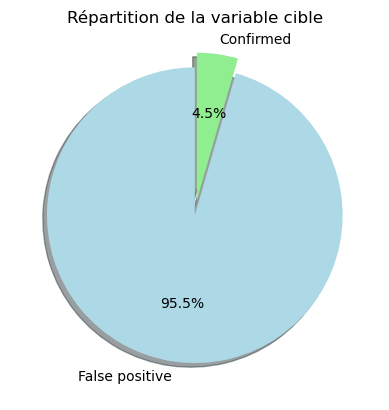

In [73]:
 #Diagramme circulaire exploded

# Exemple de données
labels = ['False positive','Confirmed']  # Catégories
sizes = df3['koi_disposition'].value_counts()  # Nombre d'occurrences ou proportions
colors = ['lightblue', 'lightgreen']  # Couleurs pour les catégories
explode = (0, 0.1)  # Décaler le deuxième segment

# Création du diagramme circulaire
#pieChart = axes[1, 1]
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Affiche les pourcentages avec un chiffre après la virgule
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True
)

# Ajouter un titre
plt.title('Répartition de la variable cible')

plt.show()


In [75]:
df3.describe()

,koi_disposition,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,2344.000000,2344.000000,2344.000000,2.344000e+03,2.344000e+03,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,...,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000
mean,0.955205,0.996799,19.277650,8.704076e-05,-9.934834e-05,0.419705,0.199137,-0.301838,4.217072,0.114214,...,-123.459898,4.420590,0.085424,-0.107661,1.013784,0.171288,-0.120362,290.977341,44.375782,14.352133
std,0.206898,0.004898,18.835928,1.039524e-04,1.193245e-04,0.336746,0.159869,0.231023,2.264226,0.080889,...,48.249654,0.202228,0.061240,0.059640,0.324541,0.117855,0.089094,4.732998,3.590741,1.173172
min,0.000000,0.987500,0.241843,2.700000e-08,-3.404737e-04,0.000000,0.000000,-1.189625,0.427900,0.000730,...,-258.000000,3.920875,0.000000,-0.237500,0.205125,0.000000,-0.319000,280.249450,36.577381,11.240125
25%,1.000000,0.995000,5.169728,1.066500e-05,-1.434000e-04,0.067750,0.042000,-0.508250,2.523525,0.053075,...,-153.000000,4.300750,0.037000,-0.128000,0.798000,0.063000,-0.160000,287.343253,41.469850,13.651000
50%,1.000000,1.000000,11.496012,3.610500e-05,-4.093000e-05,0.376000,0.180000,-0.300000,3.605950,0.092050,...,-111.000000,4.460000,0.063000,-0.108000,0.959500,0.160000,-0.088000,291.158780,44.376525,14.599000
75%,1.000000,1.000000,26.799819,1.272250e-04,-1.201750e-05,0.742000,0.352000,-0.054000,5.403475,0.155250,...,-83.000000,4.554000,0.126000,-0.055000,1.193250,0.245000,-0.054000,294.779932,47.258768,15.258250
max,1.000000,1.000000,59.244957,3.020650e-04,-2.700000e-08,1.753375,0.817000,0.000000,9.723400,0.308512,...,0.000000,4.933875,0.259500,0.000000,1.786125,0.518000,0.000000,301.720760,52.198090,17.475000


In [77]:
display(df3.head(10))
display(df3.describe())
# 0 = Confirmed
# 1 = False positive

,koi_disposition,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,1.0000,9.488036,2.775000e-05,-2.775000e-05,0.146,0.318,-0.146,2.95750,0.08190,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,1,0.9875,54.418383,2.479000e-04,-2.479000e-04,0.586,0.059,-0.443,4.50700,0.11600,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
4,1,1.0000,2.525592,3.761000e-06,-3.761000e-06,0.701,0.235,-0.478,1.65450,0.04200,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,1,1.0000,11.094321,2.036000e-05,-2.036000e-05,0.538,0.030,-0.428,4.59450,0.06100,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,1,1.0000,4.134435,1.046000e-05,-1.046000e-05,0.762,0.139,-0.532,3.14020,0.06730,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
7,1,0.9920,2.566589,1.781000e-05,-1.781000e-05,0.755,0.212,-0.523,2.42900,0.16500,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
9,1,1.0000,16.068647,1.088000e-05,-1.088000e-05,0.052,0.262,-0.052,3.53470,0.02410,...,-83.0,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841
10,1,0.9875,2.470613,2.700000e-08,-2.700000e-08,0.818,0.001,-0.001,1.74319,0.00107,...,-78.0,4.457,0.024,-0.024,0.964,0.038,-0.038,286.80847,49.316399,11.338
12,1,0.9980,3.522498,1.980000e-07,-1.980000e-07,0.631,0.007,-0.007,3.19843,0.00653,...,-137.0,4.169,0.055,-0.045,1.451,0.110,-0.110,281.28812,42.451080,13.563
13,1,1.0000,3.709214,6.536000e-06,-6.536000e-06,0.051,0.395,-0.051,2.63020,0.04270,...,-117.0,4.407,0.085,-0.114,1.022,0.143,-0.107,295.64871,48.495560,12.772


,koi_disposition,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,2344.000000,2344.000000,2344.000000,2.344000e+03,2.344000e+03,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,...,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000
mean,0.955205,0.996799,19.277650,8.704076e-05,-9.934834e-05,0.419705,0.199137,-0.301838,4.217072,0.114214,...,-123.459898,4.420590,0.085424,-0.107661,1.013784,0.171288,-0.120362,290.977341,44.375782,14.352133
std,0.206898,0.004898,18.835928,1.039524e-04,1.193245e-04,0.336746,0.159869,0.231023,2.264226,0.080889,...,48.249654,0.202228,0.061240,0.059640,0.324541,0.117855,0.089094,4.732998,3.590741,1.173172
min,0.000000,0.987500,0.241843,2.700000e-08,-3.404737e-04,0.000000,0.000000,-1.189625,0.427900,0.000730,...,-258.000000,3.920875,0.000000,-0.237500,0.205125,0.000000,-0.319000,280.249450,36.577381,11.240125
25%,1.000000,0.995000,5.169728,1.066500e-05,-1.434000e-04,0.067750,0.042000,-0.508250,2.523525,0.053075,...,-153.000000,4.300750,0.037000,-0.128000,0.798000,0.063000,-0.160000,287.343253,41.469850,13.651000
50%,1.000000,1.000000,11.496012,3.610500e-05,-4.093000e-05,0.376000,0.180000,-0.300000,3.605950,0.092050,...,-111.000000,4.460000,0.063000,-0.108000,0.959500,0.160000,-0.088000,291.158780,44.376525,14.599000
75%,1.000000,1.000000,26.799819,1.272250e-04,-1.201750e-05,0.742000,0.352000,-0.054000,5.403475,0.155250,...,-83.000000,4.554000,0.126000,-0.055000,1.193250,0.245000,-0.054000,294.779932,47.258768,15.258250
max,1.000000,1.000000,59.244957,3.020650e-04,-2.700000e-08,1.753375,0.817000,0.000000,9.723400,0.308512,...,0.000000,4.933875,0.259500,0.000000,1.786125,0.518000,0.000000,301.720760,52.198090,17.475000


Matrice de correlation

Matrice de correlation: 



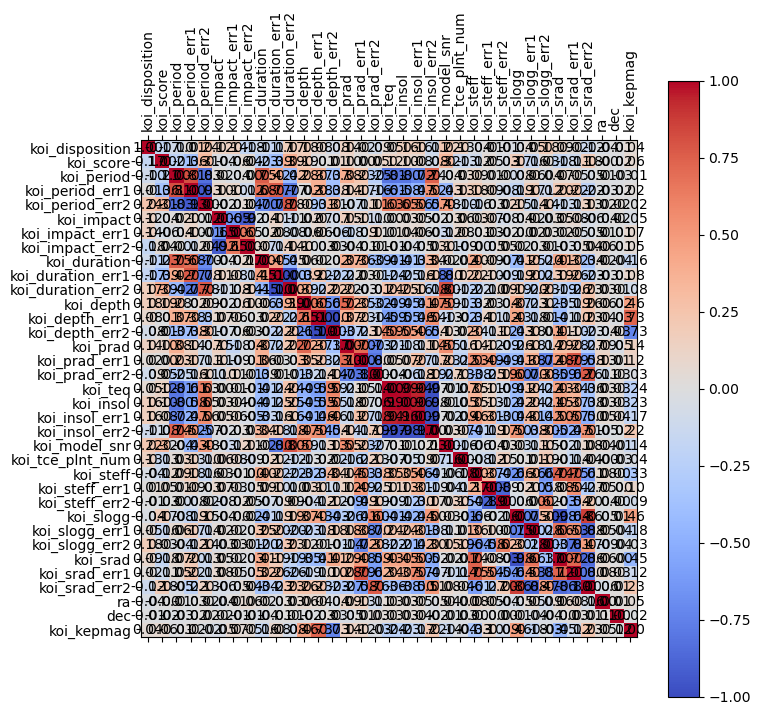

In [80]:

numeric_df = df3.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr(method='spearman')
target_correlations = corr_matrix['koi_disposition']
print("Matrice de correlation: \n",)
corr_matrix
# Creer une figure et un axe
fig, ax = plt.subplots(figsize=(8, 8))

# Afficher la matrice de correlation avec imshow
cax = ax.matshow(corr_matrix, cmap='coolwarm')

# Ajouter une barre de couleur
fig.colorbar(cax)
# Definir les etiquettes des axes
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

# Rotation des étiquettes de l'axe pour une meilleure lisibilité

plt.xticks(rotation=90)


# Afficher les valeurs de correlation sur la matrice
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f"{corr_matrix.iloc[i,j]:.2f}",
                  ha="center", va="center", color="black")
plt.show()

In [81]:
corr_matrix


,koi_disposition,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
koi_disposition,1.000000,-0.173694,-0.097475,0.011851,0.243674,0.120935,0.142717,-0.179444,-0.107254,-0.169851,...,-0.008117,-0.042568,0.046203,0.184613,0.087378,0.021094,-0.121167,-0.040811,-0.005678,0.042195
koi_score,-0.173694,1.000000,-0.214540,-0.360513,0.312680,-0.042348,-0.057206,0.042667,-0.233606,-0.386185,...,-0.031853,0.173666,-0.161805,0.026469,-0.175439,-0.110249,0.180306,-0.004853,-0.022204,0.064799
koi_period,-0.097475,-0.214540,1.000000,0.810689,-0.831307,0.018173,-0.037498,0.001553,0.750750,0.415136,...,0.002414,-0.079942,0.059606,-0.038170,0.068334,0.045351,-0.051495,0.005139,-0.030138,-0.008476
koi_period_err1,0.011851,-0.360513,0.810689,1.000000,-0.931370,0.099965,0.098169,-0.118092,0.682179,0.767447,...,-0.079177,-0.188714,0.168934,-0.124350,0.199293,0.220757,-0.217157,-0.029423,-0.019115,0.022706
koi_period_err2,0.243674,0.312680,-0.831307,-0.931370,1.000000,-0.021717,-0.009806,0.040480,-0.696725,-0.779302,...,0.015039,0.146389,-0.143281,0.142137,-0.127160,-0.131157,0.129872,0.015591,0.021734,-0.018401
koi_impact,0.120935,-0.042348,0.018173,0.099965,-0.021717,1.000000,-0.654109,-0.924899,-0.041294,0.112560,...,-0.075361,-0.036649,0.023967,-0.033308,0.051321,0.077617,-0.056368,-0.043294,0.015432,-0.049812
koi_impact_err1,0.142717,-0.057206,-0.037498,0.098169,-0.009806,-0.654109,1.000000,0.647028,-0.020367,0.078184,...,-0.022251,-0.002633,0.016930,0.027554,0.023043,0.046167,-0.054861,0.006112,-0.008362,0.070946
koi_impact_err2,-0.179444,0.042667,0.001553,-0.118092,0.040480,-0.924899,0.647028,1.000000,0.071511,-0.135195,...,0.052773,0.020983,-0.028823,0.008900,-0.031467,-0.051380,0.044920,0.058648,-0.012204,0.045395
koi_duration,-0.107254,-0.233606,0.750750,0.682179,-0.696725,-0.041294,-0.020367,0.071511,1.000000,0.451558,...,-0.067557,-0.405409,0.251832,-0.198823,0.407133,0.317173,-0.339883,0.023560,-0.040731,-0.162492
koi_duration_err1,-0.169851,-0.386185,0.415136,0.767447,-0.779302,0.112560,0.078184,-0.135195,0.451558,1.000000,...,-0.089998,-0.187215,0.199102,-0.226287,0.187950,0.260932,-0.228942,-0.033404,-0.006642,0.082478


In [82]:

target_correlations = abs(corr_matrix['koi_disposition'])
ordered_variables = target_correlations.sort_values(ascending=False).drop('koi_disposition').index

print("Ordered Variables (by absolute correlation with 'koi_disposition'):")
#print(ordered_variables)
print(f"\nCorrelations avec {'koi_disposition'}:")
target_correlations.sort_values(ascending=False)


Ordered Variables (by absolute correlation with 'koi_disposition'):

Correlations avec koi_disposition:


koi_disposition      1.000000
koi_period_err2      0.243674
koi_model_snr        0.219569
koi_slogg_err2       0.184613
koi_impact_err2      0.179444
koi_depth            0.178787
koi_score            0.173694
koi_duration_err1    0.169851
koi_duration_err2    0.169851
koi_insol            0.161682
koi_insol_err1       0.159287
koi_impact_err1      0.142717
koi_prad             0.138452
koi_tce_plnt_num     0.134229
koi_srad_err2        0.121167
koi_impact           0.120935
koi_duration         0.107254
koi_insol_err2       0.106486
koi_period           0.097475
koi_prad_err2        0.088498
koi_srad             0.087378
koi_depth_err2       0.077949
koi_depth_err1       0.077949
koi_teq              0.051760
koi_slogg_err1       0.046203
koi_steff            0.044206
koi_slogg            0.042568
koi_kepmag           0.042195
ra                   0.040811
koi_prad_err1        0.024738
koi_srad_err1        0.021094
koi_steff_err1       0.013769
koi_period_err1      0.011851
koi_steff_

## Extraction des prédicteurs

In [87]:
# Creation d un dictionaire contenant
data = corr_matrix.to_dict(orient='list')
# Creation de la liste des variables en ordre decroissant des indices de correlation:
variables = ['koi_disposition','koi_period_err2', 'koi_model_snr','koi_slogg_err2', 'koi_impact_err2', 'koi_depth', 'koi_score', 'koi_duration_err2', 'koi_duration_err1', 'koi_insol', 'koi_insol_err1', 'koi_impact_err1', 'koi_prad',
'koi_tce_plnt_num', 'koi_srad_err2', 'koi_impact', 'koi_duration', 'koi_insol_err2', 'koi_period', 'koi_prad_err2','koi_srad', 'koi_depth_err2', 'koi_depth_err1', 'koi_teq', 'koi_slogg_err1', 'koi_steff',
'koi_slogg', 'koi_kepmag', 'ra', 'koi_prad_err1', 'koi_srad_err1', 'koi_steff_err1', 'koi_period_err1',
'koi_steff_err2', 'dec']
data_filtrée = {var: [corr_matrix[var][v] for v in variables] for var in variables if var in corr_matrix.columns}

# Create DataFrame
corr_matrix = pd.DataFrame(data_filtrée, index=data.keys())

# List des predicteurs (sans la variable cible)
predictors = [col for col in corr_matrix.columns if col != 'koi_disposition']

# Sort predictors by absolute correlation with koi_disposition
target_corrs = [(pred, abs(corr_matrix['koi_disposition'][pred])) for pred in predictors]
sorted_predictors = sorted(target_corrs, key=lambda x: x[1], reverse=True)

# Threshold for multicollinearity between predictors
multicollinearity_threshold = 0.3

# Initialize list of selected predictors
selected_predictors = []

# Analyze and eliminate dependent variables
print("Analyzing predictors for independence (multicollinearity threshold = 0.3):\n")
for predictor, target_corr in sorted_predictors:
    print(f"Predictor: {predictor}, Correlation with koi_disposition: {target_corr:.6f}")
    # Check if predictor is independent from already selected predictors
    is_independent = True
    for selected in selected_predictors:
        corr_with_selected = abs(corr_matrix[predictor][selected])
        if corr_with_selected > multicollinearity_threshold:
            print(f"  - Eliminated {predictor} (corr with {selected} = {corr_with_selected:.6f})")
            is_independent = False
            break
    if is_independent:
        selected_predictors.append(predictor)
        print(f"  - Kept {predictor}")
    print(f"  - Current selected predictors: {len(selected_predictors)}\n")

# Output final list of independent predictors
print("Final list of independent predictors:")
for pred in selected_predictors:
    print(f"{pred}: Correlation with koi_disposition = {corr_matrix['koi_disposition'][pred]:.6f}")



Analyzing predictors for independence (multicollinearity threshold = 0.3):

Predictor: koi_score, Correlation with koi_disposition: 0.243674
  - Kept koi_score
  - Current selected predictors: 1

Predictor: koi_period, Correlation with koi_disposition: 0.219569
  - Eliminated koi_period (corr with koi_score = 0.831307)
  - Current selected predictors: 1

Predictor: koi_period_err1, Correlation with koi_disposition: 0.184613
  - Eliminated koi_period_err1 (corr with koi_score = 0.931370)
  - Current selected predictors: 1

Predictor: koi_period_err2, Correlation with koi_disposition: 0.179444
  - Eliminated koi_period_err2 (corr with koi_score = 1.000000)
  - Current selected predictors: 1

Predictor: koi_impact, Correlation with koi_disposition: 0.178787
  - Kept koi_impact
  - Current selected predictors: 2

Predictor: koi_impact_err1, Correlation with koi_disposition: 0.173694
  - Kept koi_impact_err1
  - Current selected predictors: 3

Predictor: koi_impact_err2, Correlation with ko

In [89]:
Predictors_target = ['koi_disposition', 'koi_score', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_tce_plnt_num', 'koi_steff_err1', 'koi_steff_err2', 'ra', 'dec']

Maintenant on va garder seulement les collones des predicteurs et la variable cible de la base de données df1:

In [92]:
df_predict = df3[Predictors_target]
print(df_predict.info())
display(df_predict.head())
display(df_predict.describe())
print(df_predict.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 2344 entries, 0 to 9540
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   koi_disposition   2344 non-null   int32  
 1   koi_score         2344 non-null   float64
 2   koi_impact        2344 non-null   float64
 3   koi_impact_err1   2344 non-null   float64
 4   koi_impact_err2   2344 non-null   float64
 5   koi_tce_plnt_num  2344 non-null   float64
 6   koi_steff_err1    2344 non-null   float64
 7   koi_steff_err2    2344 non-null   float64
 8   ra                2344 non-null   float64
 9   dec               2344 non-null   float64
dtypes: float64(9), int32(1)
memory usage: 192.3 KB
None


,koi_disposition,koi_score,koi_impact,koi_impact_err1,koi_impact_err2,koi_tce_plnt_num,koi_steff_err1,koi_steff_err2,ra,dec
0,1,1.0000,0.146,0.318,-0.146,1.0,81.0,-81.0,291.93423,48.141651
1,1,0.9875,0.586,0.059,-0.443,2.0,81.0,-81.0,291.93423,48.141651
4,1,1.0000,0.701,0.235,-0.478,1.0,169.0,-211.0,288.75488,48.226200
5,1,1.0000,0.538,0.030,-0.428,1.0,189.0,-232.0,296.28613,48.224670
6,1,1.0000,0.762,0.139,-0.532,2.0,189.0,-232.0,296.28613,48.224670


,koi_disposition,koi_score,koi_impact,koi_impact_err1,koi_impact_err2,koi_tce_plnt_num,koi_steff_err1,koi_steff_err2,ra,dec
count,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000
mean,0.955205,0.996799,0.419705,0.199137,-0.301838,1.399531,116.420755,-123.459898,290.977341,44.375782
std,0.206898,0.004898,0.336746,0.159869,0.231023,0.706228,38.921424,48.249654,4.732998,3.590741
min,0.000000,0.987500,0.000000,0.000000,-1.189625,1.000000,0.000000,-258.000000,280.249450,36.577381
25%,1.000000,0.995000,0.067750,0.042000,-0.508250,1.000000,81.000000,-153.000000,287.343253,41.469850
50%,1.000000,1.000000,0.376000,0.180000,-0.300000,1.000000,107.000000,-111.000000,291.158780,44.376525
75%,1.000000,1.000000,0.742000,0.352000,-0.054000,2.000000,153.250000,-83.000000,294.779932,47.258768
max,1.000000,1.000000,1.753375,0.817000,0.000000,3.500000,261.625000,0.000000,301.720760,52.198090


koi_disposition     0
koi_score           0
koi_impact          0
koi_impact_err1     0
koi_impact_err2     0
koi_tce_plnt_num    0
koi_steff_err1      0
koi_steff_err2      0
ra                  0
dec                 0
dtype: int64


In [94]:
#Normaliser  using MinMaxScaler les variables koi_steff_err1, koi_steff_err2, ra et dec
columns_to_normalize = ['koi_steff_err1', 'koi_steff_err2', 'ra', 'dec']
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_predict[columns_to_normalize])
df_predict[columns_to_normalize]=normalized_data
print(df_predict[columns_to_normalize].head())
display(df_predict.head())

   koi_steff_err1  koi_steff_err2        ra       dec
0        0.309603        0.686047  0.544204  0.740317
1        0.309603        0.686047  0.544204  0.740317
4        0.645963        0.182171  0.396130  0.745729
5        0.722408        0.100775  0.746889  0.745631
6        0.722408        0.100775  0.746889  0.745631


C:\Users\d2s1a\AppData\Local\Temp\ipykernel_13328\2539748810.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict[columns_to_normalize]=normalized_data


,koi_disposition,koi_score,koi_impact,koi_impact_err1,koi_impact_err2,koi_tce_plnt_num,koi_steff_err1,koi_steff_err2,ra,dec
0,1,1.0000,0.146,0.318,-0.146,1.0,0.309603,0.686047,0.544204,0.740317
1,1,0.9875,0.586,0.059,-0.443,2.0,0.309603,0.686047,0.544204,0.740317
4,1,1.0000,0.701,0.235,-0.478,1.0,0.645963,0.182171,0.396130,0.745729
5,1,1.0000,0.538,0.030,-0.428,1.0,0.722408,0.100775,0.746889,0.745631
6,1,1.0000,0.762,0.139,-0.532,2.0,0.722408,0.100775,0.746889,0.745631


Loi normale Utilisez le test de Shapiro-Wilk pour vérifier si la variable koi_score suivent une loi normale.

In [97]:
from scipy.stats import shapiro
predictor = df_predict['koi_score']

# Test de Shapiro-Wilk pour la normalité
stat, p_value = shapiro(predictor)

# Affichage des résultats
print("Statistique du test de Shapiro-Wilk :", stat)
print("P-valeur :", p_value)


# 3.2 Comparez la p-value obtenue avec un seuil de signification de 0,05. Concluez sur la normalité des âges.

if p_value > 0.05:
    print("Les données suivent une distribution normale (on ne rejette pas l'hypothèse nulle).")
else:
    print("Les données ne suivent pas une distribution normale (on rejette l'hypothèse nulle).")


Statistique du test de Shapiro-Wilk : 0.6457478065478877
P-valeur : 1.0769662386811743e-56
Les données ne suivent pas une distribution normale (on rejette l'hypothèse nulle).


Commme est montré par l'hystogramme, la variable koi_score ne suive pas une distribution normale.

In [100]:
# Analyse de la variance (ANOVA) pour étudier l'effet de la varisble koi_impact_err1 sur la variable koi_impact

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

def perform_anova(df, col1_name, col2_name):
  """
  Performs a one-way ANOVA between two columns in a Pandas DataFrame.

  Args:
    df: The Pandas DataFrame.
    col1_name: The name of the first column (grouping variable).
    col2_name: The name of the second column (dependent variable).

  Returns:
    A tuple containing the F-statistic and p-value, or None if an error occurs.
  """
  try:
    groups = df.groupby(col1_name)[col2_name].apply(list) #Group the dependent variable by the groups defined in the independent variable.
    f_statistic, p_value = stats.f_oneway(*groups) #unpack the lists of the grouped variables into the f_oneway function.
    return f_statistic, p_value
  except KeyError:
    print(f"Error: One or both of the columns '{col1_name}' and '{col2_name}' do not exist in the DataFrame.")
    return None
  except TypeError:
    print(f"Error: The dependent variable '{col2_name}' must be numeric.")
    return None
  except ValueError:
    print("Error: Not enough groups to perform ANOVA.")
    return None


In [101]:
perform_anova(df_predict, 'koi_impact_err1' , 'koi_impact')

(6.517633485062501, 3.354486527444971e-198)

Le test Anova montre une relation significative entre les deux variables, confirmée aussi par le scatterplot en dessous.

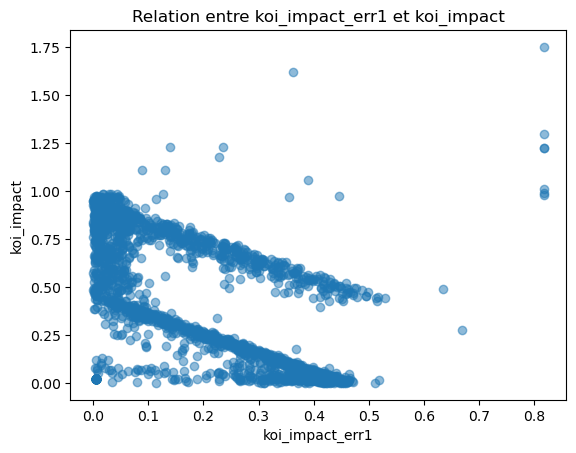

In [105]:
plt.scatter(df_predict['koi_impact_err1'], df_predict['koi_impact'], alpha=0.5)
plt.title('Relation entre koi_impact_err1 et koi_impact')
plt.xlabel('koi_impact_err1')
plt.ylabel('koi_impact')
plt.show()


Test d'hypothèse
L'hypothèse nulle (H0) et l'hypothèse alternative (H1) pour tester si les valeurs de koi_disposition  diffèrent significativement fonction des valeurs du predicteur 'koi_impact'

In [108]:
from scipy.stats import ttest_ind
# Extraction des valeurs du 'koi_impact' pour  (koi_disposition = 1)
False_positive = df_predict.loc[df_predict['koi_disposition'] == 1, 'koi_impact']

# Extraction des valeurs du 'koi_impact' pour  (koi_disposition = 0)
Confirmed = df_predict.loc[df_predict['koi_disposition'] == 0, 'koi_impact']

# Affichage pour confirmation
print("'koi_impact' pour False_positive :", len(False_positive))
print("'koi_impact' pour Confirmed :", len(Confirmed))

# 4.2 Réalisation du test de Student pour comparer les âges moyens
# H₀ : Les âges moyens des survivants et des non-survivants sont égaux (pas de différence significative).
# H₁ : Les âges moyens des survivants et des non-survivants sont différents (il existe une différence significative).

stat, p_value = ttest_ind(False_positive, Confirmed)

# Affichage des résultats avec explications
print("Statistique du test de Student :", stat)
print("P-valeur :", p_value)

# Interprétation des résultats
alpha = 0.05  # Niveau de signification habituel (5%)
if p_value < alpha:
    print("Conclusion : Il y a une différence significative entre les valeurs de 'koi_impact' et les valeurs de la variable cible 'koi_disposition (on rejette H0).")
else:
    print("Conclusion : Il n'y a pas de différence significative entre les valeurs de 'koi_impact' et les valeurs de la variable cible 'koi_disposition (on ne rejette pas H0).")


'koi_impact' pour False_positive : 2239
'koi_impact' pour Confirmed : 105
Statistique du test de Student : 4.598806016495017
P-valeur : 4.47544984917257e-06
Conclusion : Il y a une différence significative entre les valeurs de 'koi_impact' et les valeurs de la variable cible 'koi_disposition (on rejette H0).


## La relation entre la variable cible et le plus proche predicteur

C:\Users\d2s1a\AppData\Local\Temp\ipykernel_13328\1873986417.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_predict[df_predict['koi_disposition'] == 0]['koi_impact'], df_predict[df_predict['koi_disposition'] == 1]['koi_impact']],


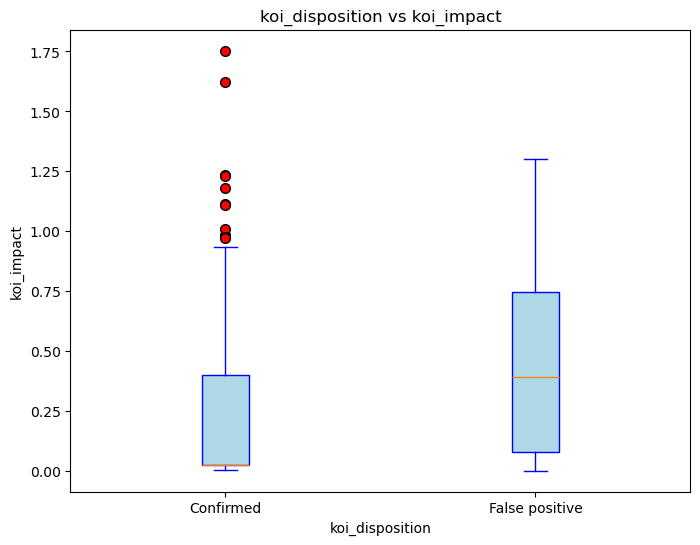

In [111]:
# Boxplot

# Créer un boxplot avec matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot([df_predict[df_predict['koi_disposition'] == 0]['koi_impact'], df_predict[df_predict['koi_disposition'] == 1]['koi_impact']],
            labels=['Confirmed', 'False positive'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=7))

# Ajouter un titre et des étiquettes
plt.title('koi_disposition vs koi_impact')
plt.xlabel('koi_disposition')
plt.ylabel('koi_impact')
plt.xticks([1, 2], ['Confirmed', 'False positive'])

# Afficher le graphique
plt.show()


In [113]:
df_predict.to_csv('data_clean_pristine.csv')

In [115]:
from sklearn.utils import resample

print(df_predict['koi_disposition'].value_counts())  # Check class distribution

# Separate majority and minority classes
df_majority = df_predict[df_predict['koi_disposition'] == 1]  # Assuming '1' is CONFIRMED
df_minority = df_predict[df_predict['koi_disposition'] == 0]  # Assuming '0' is FALSE POSITIVE

# Check if DataFrames are non-empty
print("Majority class size:", len(df_majority))
print("Minority class size:", len(df_minority))

# Oversample minority class
df_minority_oversampled = resample(df_minority,
                                  replace=True,  # Sample with replacement
                                  n_samples=len(df_majority),  # Match majority class size
                                  random_state=42)  # Reproducibility

# Combine majority and oversampled minority
df_oversampled = pd.concat([df_majority, df_minority_oversampled])

# Verify the new class distribution
print(df_oversampled['koi_disposition'].value_counts())

koi_disposition
1    2239
0     105
Name: count, dtype: int64
Majority class size: 2239
Minority class size: 105
koi_disposition
1    2239
0    2239
Name: count, dtype: int64


In [117]:
display(df_oversampled.head(10))
display(df_oversampled.describe())

,koi_disposition,koi_score,koi_impact,koi_impact_err1,koi_impact_err2,koi_tce_plnt_num,koi_steff_err1,koi_steff_err2,ra,dec
0,1,1.0000,0.146,0.318,-0.146,1.0,0.309603,0.686047,0.544204,0.740317
1,1,0.9875,0.586,0.059,-0.443,2.0,0.309603,0.686047,0.544204,0.740317
4,1,1.0000,0.701,0.235,-0.478,1.0,0.645963,0.182171,0.396130,0.745729
5,1,1.0000,0.538,0.030,-0.428,1.0,0.722408,0.100775,0.746889,0.745631
6,1,1.0000,0.762,0.139,-0.532,2.0,0.722408,0.100775,0.746889,0.745631
7,1,0.9920,0.755,0.212,-0.523,3.0,0.722408,0.100775,0.746889,0.745631
9,1,1.0000,0.052,0.262,-0.052,1.0,0.286670,0.678295,0.314374,0.755306
10,1,0.9875,0.818,0.001,-0.001,1.0,0.298137,0.697674,0.305478,0.815521
12,1,0.9980,0.631,0.007,-0.007,1.0,0.428094,0.468992,0.048375,0.376020
13,1,1.0000,0.051,0.395,-0.051,2.0,0.401338,0.546512,0.717202,0.762973


,koi_disposition,koi_score,koi_impact,koi_impact_err1,koi_impact_err2,koi_tce_plnt_num,koi_steff_err1,koi_steff_err2,ra,dec
count,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000
mean,0.500000,0.998325,0.349125,0.162153,-0.219021,1.209134,0.449953,0.506532,0.520167,0.503071
std,0.500056,0.003887,0.370688,0.171192,0.228118,0.548496,0.164098,0.215012,0.210068,0.237896
min,0.000000,0.987500,0.000000,0.000000,-1.189625,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.022000,0.005000,-0.403900,1.000000,0.298137,0.360465,0.372437,0.322828
50%,0.500000,1.000000,0.189700,0.088000,-0.116000,1.000000,0.401338,0.579457,0.525082,0.507569
75%,1.000000,1.000000,0.646900,0.311000,-0.022000,1.000000,0.600096,0.693798,0.682688,0.694165
max,1.000000,1.000000,1.753375,0.817000,0.000000,3.500000,1.000000,1.000000,1.000000,1.000000


In [119]:
df_oversampled.to_csv('data_clean.csv')

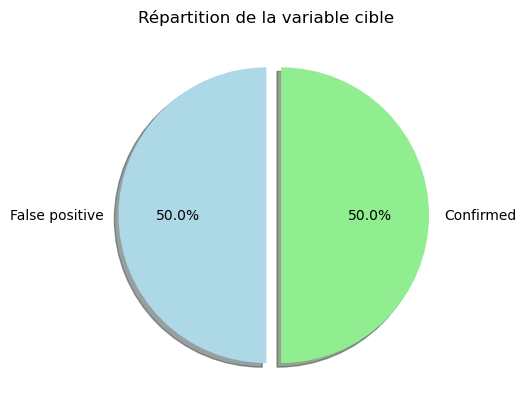

In [121]:
#Diagramme circulaire exploded

# Exemple de données
labels = ['False positive','Confirmed']  # Catégories
sizes = df_oversampled['koi_disposition'].value_counts()  # Nombre d'occurrences ou proportions
colors = ['lightblue', 'lightgreen']  # Couleurs pour les catégories
explode = (0, 0.1)  # Décaler le deuxième segment

# Création du diagramme circulaire
#pieChart = axes[1, 1]
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Affiche les pourcentages avec un chiffre après la virgule
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True
)

# Ajouter un titre
plt.title('Répartition de la variable cible')

plt.show()
